In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import os
from math import * 
os.getcwd()
print("The current directory is: ")
print(os.getcwd())
path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)
print("Moving up to the parent directory")
print(os.getcwd())

The current directory is: 
c:\Users\springnuance\Desktop\Abaqus-Macromechanics-Project\notebooks
Moving up to the parent directory
c:\Users\springnuance\Desktop\Abaqus-Macromechanics-Project


In [2]:
from stage0_configs import *
from modules.helper import *
info = main_config()


Welcome to the Abaqus parameter calibration project


The configurations you have chosen: 

+------------------------+-------------+
|     Global Configs     | User choice |
+------------------------+-------------+
| Number of initial sims |      20     |
|  Initial sims spacing  |     1000    |
|   Optimize strategy    |     SOO     |
|        Material        | DP1000_room |
|     Hardening law      |    Swift    |
|        Geometry        |    NDBR50   |
|      Curve index       |      2      |
|     Optimizer name     |      BO     |
|   Deviation percent    |      5      |
+------------------------+-------------+

Generating necessary directories

The path to your main project folder is

c:\Users\springnuance\Desktop\Abaqus-Macromechanics-Project



[0.0, 0.0300013, 0.0600055, 0.0899964, 0.119974, 0.14993, 0.179882, 0.209834, 0.239786, 0.269773, 0.299776, 0.32978, 0.359783, 0.389786, 0.41979, 0.449789, 0.479764, 0.509665, 0.539566, 0.569467, 0.599481, 0.629625, 0.659766, 0.689906, 0.720051, 0.750191, 0.780331, 0.810476, 0.840617, 0.870757, 0.900902, 0.931042, 0.961187, 0.991327, 1.02147, 1.05161, 1.08175, 1.11148, 1.14121, 1.17094, 1.20067, 1.2304, 1.26013, 1.28986, 1.31959, 1.34931, 1.37904, 1.40877, 1.4385, 1.46823, 1.49823, 1.52853, 1.55882, 1.58911, 1.61941, 1.6497, 1.68, 1.71029, 1.74058, 1.77088, 1.80117, 1.83146, 1.86176, 1.89205, 1.92234, 1.95263, 1.98293, 2.01321, 2.04308, 2.07295, 2.10281, 2.1329, 2.16291, 2.19289, 2.2228, 2.25296, 2.28268, 2.313, 2.34291, 2.3729, 2.40361, 2.43348, 2.46269, 2.49333, 2.52359, 2.55344, 2.58253, 2.61314, 2.64386, 2.67346, 2.70281, 2.73294, 2.76352, 2.79339, 2.82223, 2.85212, 2.88334, 2.91374, 2.944, 2.9728, 3.0016]


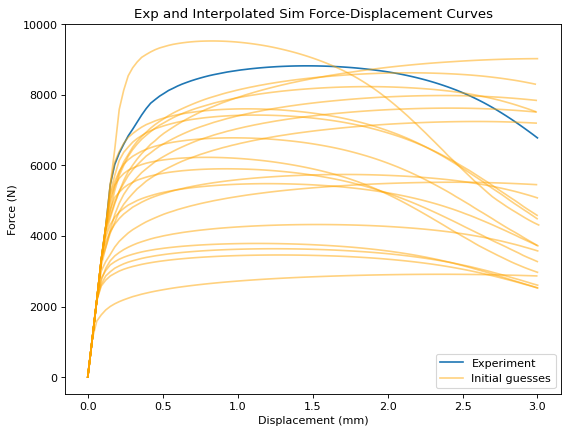

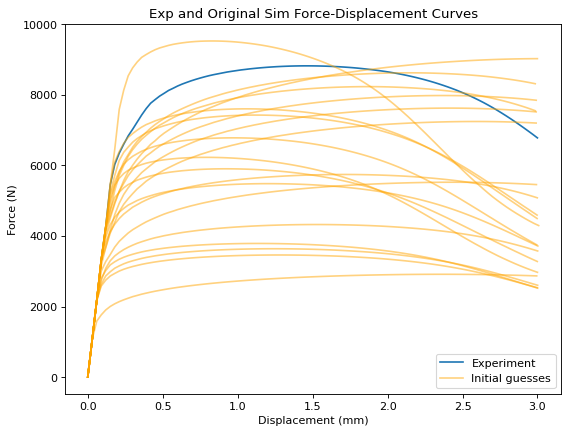

In [3]:
resultPath = info['resultPath']
targetPath = info['targetPath']
# Load csv file
target = pd.read_csv(f"{targetPath}/FD_Curve.csv")
expForce = target['force/N'].to_numpy()
expDisplacement = target['displacement/mm'].to_numpy() 
#print(max(expDisplacement))
targetCurve = {}
targetCurve['displacement'] = expDisplacement
targetCurve['force'] = expForce

initial_original_FD_Curves = np.load(f"{resultPath}/initial/common/FD_Curves.npy", allow_pickle=True).tolist()
initial_interpolated_FD_Curves = interpolating_FD_Curves(initial_original_FD_Curves, targetCurve)
print(list(initial_interpolated_FD_Curves.values())[0]['displacement'])


# print(maxDisp)
# Plotting all FD curves
figure(figsize=(8, 6), dpi=80)
plt.plot(expDisplacement, expForce, label='Experiment')
for param in initial_interpolated_FD_Curves:
    plt.plot(initial_interpolated_FD_Curves[param]['displacement'], initial_interpolated_FD_Curves[param]['force'], color='orange', alpha=0.5,
             #label=param
             )
plt.plot([],[], color='orange', alpha=0.5, label='Initial guesses')
plt.title('Exp and Interpolated Sim Force-Displacement Curves')
plt.xlabel('Displacement (mm)')
plt.ylabel('Force (N)')
plt.legend()

# print(maxDisp)
# Plotting all FD curves
figure(figsize=(8, 6), dpi=80)
plt.plot(expDisplacement, expForce, label='Experiment')
for param in initial_original_FD_Curves:
    plt.plot(initial_original_FD_Curves[param]['displacement'], initial_original_FD_Curves[param]['force'], color='orange', alpha=0.5,
             #label=param
             )
plt.plot([],[], color='orange', alpha=0.5, label='Initial guesses')
plt.title('Exp and Original Sim Force-Displacement Curves')
plt.xlabel('Displacement (mm)')
plt.ylabel('Force (N)')
plt.legend()



Continuous area bounded by the curves: 13567.526866240696


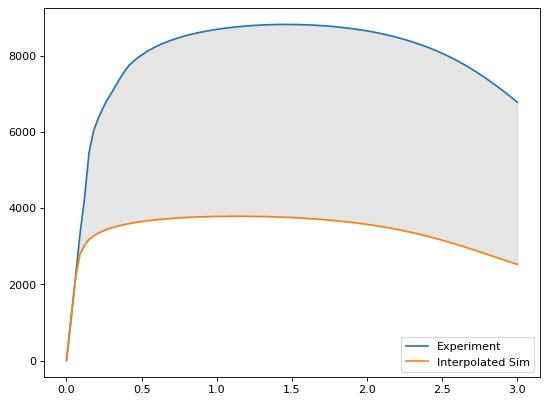

Continuous area bounded by the curves: 11795.050723658587


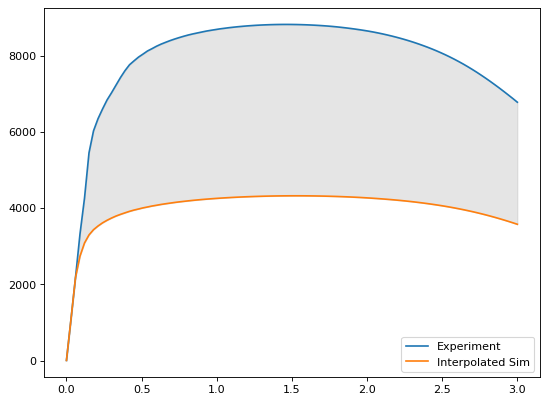

Continuous area bounded by the curves: 13843.818903845116


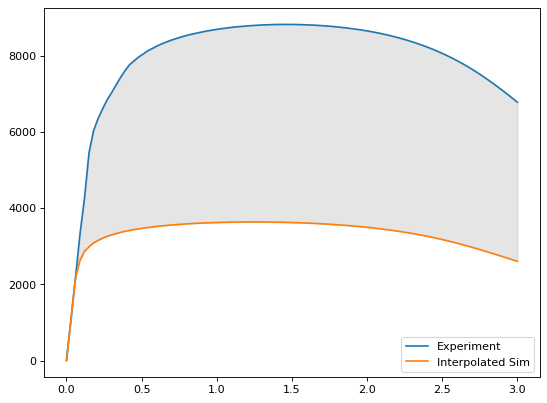

Continuous area bounded by the curves: 9018.634502404413


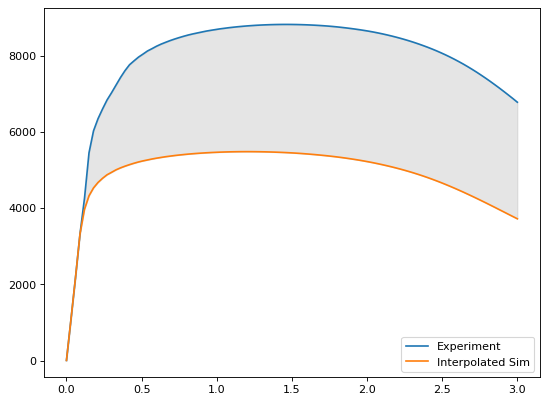

Continuous area bounded by the curves: 1464.6855256895624


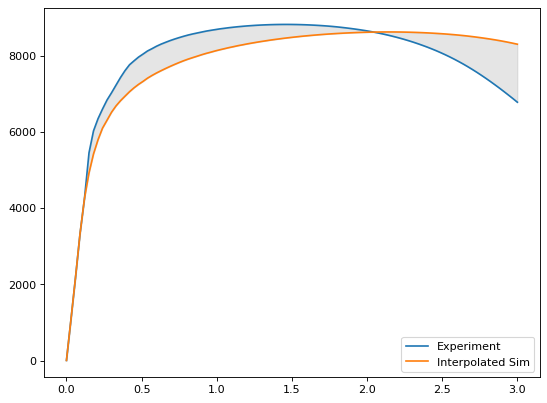

Continuous area bounded by the curves: 6358.635210374785


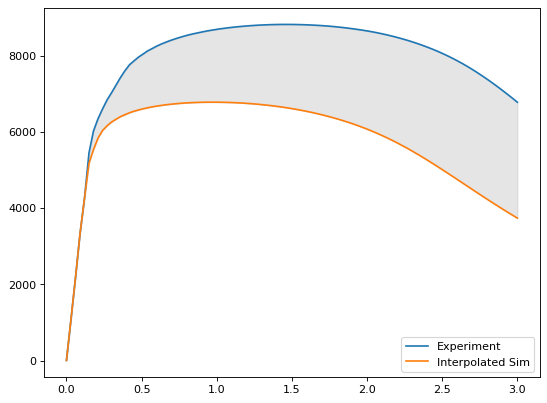

Continuous area bounded by the curves: 8721.325971847882


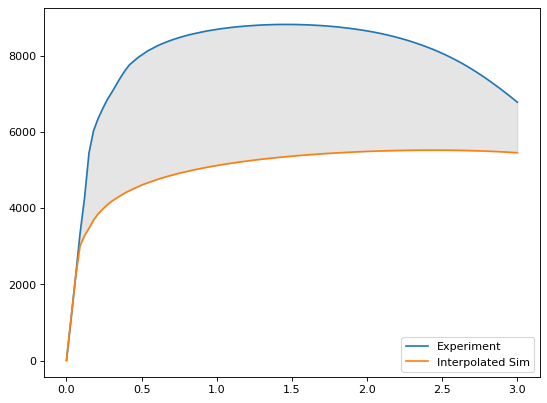

Continuous area bounded by the curves: 3400.7448416439784


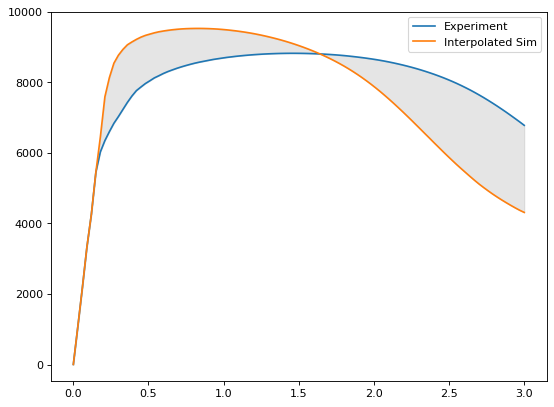

Continuous area bounded by the curves: 7846.5865106625115


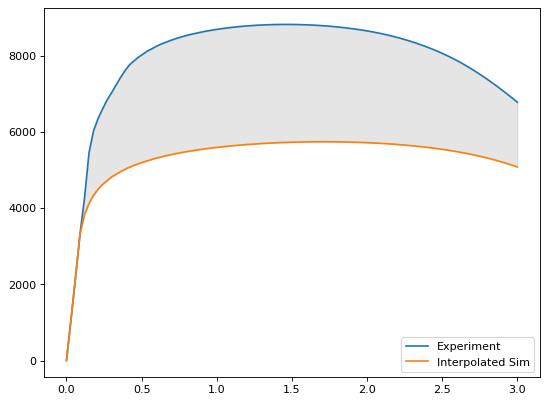

Continuous area bounded by the curves: 1588.8325876827394


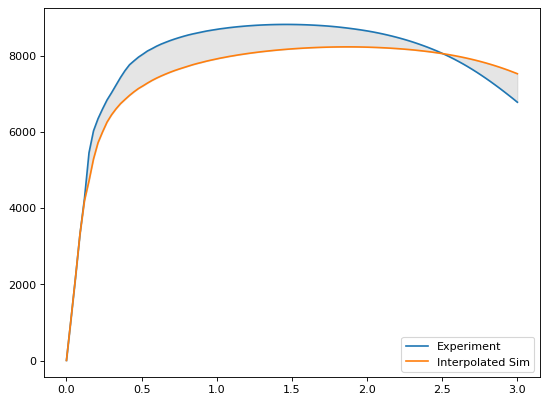

Continuous area bounded by the curves: 15757.720979679674


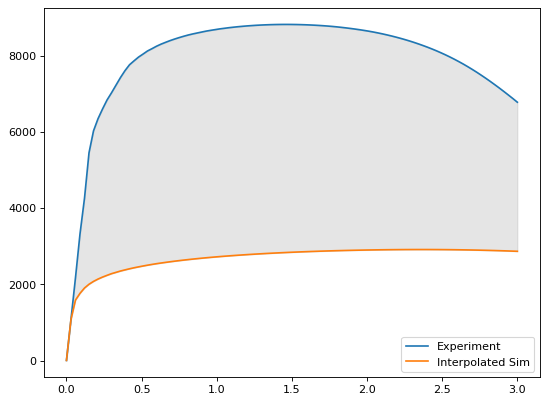

Continuous area bounded by the curves: 14282.23821216394


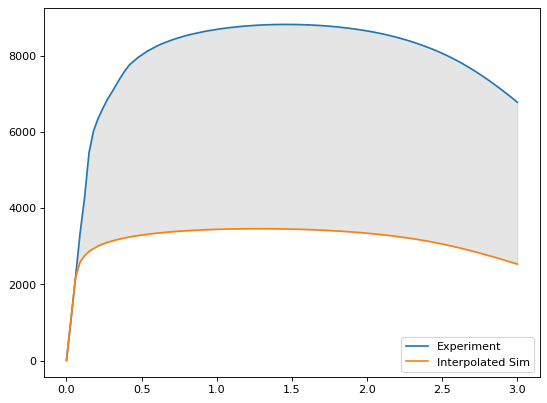

Continuous area bounded by the curves: 4269.828359351901


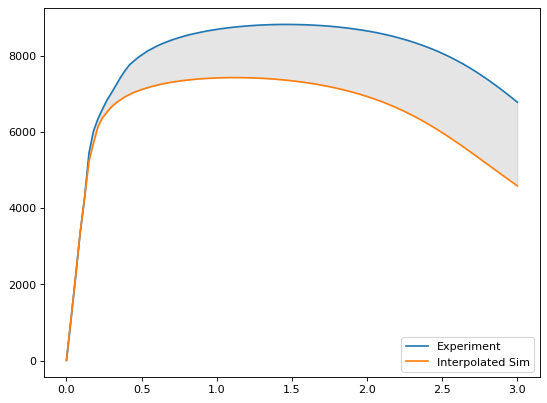

Continuous area bounded by the curves: 2617.157053944586


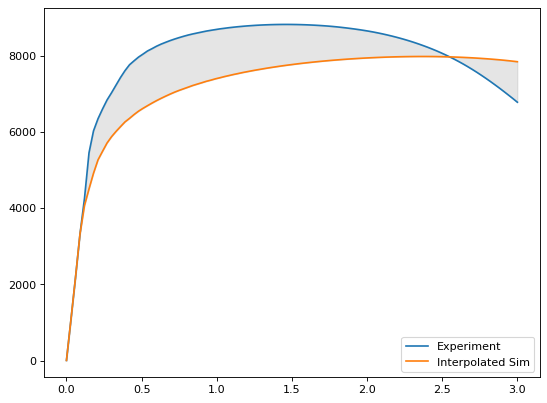

Continuous area bounded by the curves: 3989.920278884093


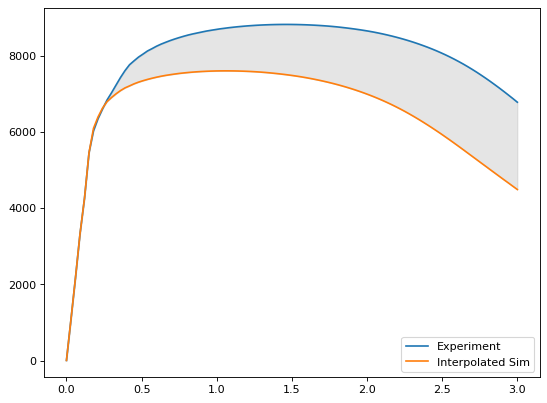

Continuous area bounded by the curves: 3406.493301081219


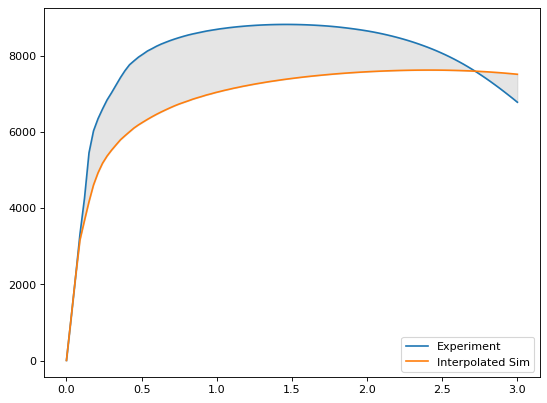

Continuous area bounded by the curves: 2232.650529411885


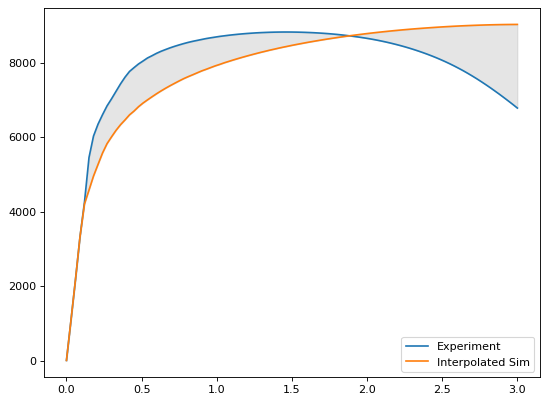

Continuous area bounded by the curves: 4384.962198519137


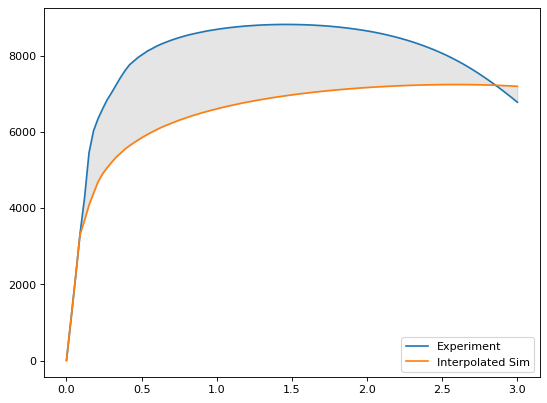

Continuous area bounded by the curves: 8615.504474019057


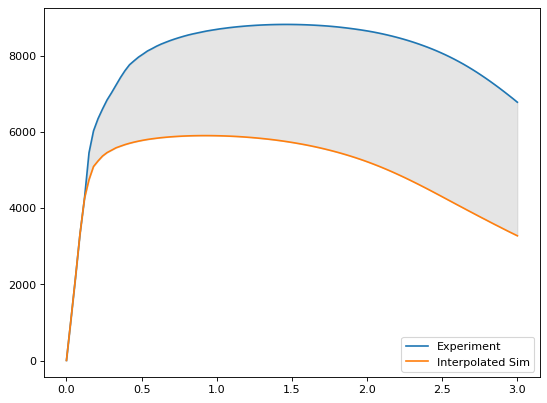

In [49]:
# Plotting the FD curve
from scipy.integrate import quad, nquad, simpson
# import interp1d
from scipy.interpolate import interp1d

targetDisplacement = targetCurve['displacement']
targetForce = targetCurve['force']


def lossFD_area(targetDisplacement, targetForce, interpolated_simForce):
    # Implementing numerical integration of the area bounded by the two curves and two vertical x axis
    # Define the x-range boundary
    x_start = min(targetDisplacement)
    x_end = max(targetDisplacement)

    # Interpolate the simulated force-displacement curve
    sim_FD_func = interp1d(targetDisplacement, interpolated_simForce, fill_value="extrapolate")
    target_FD_func = interp1d(targetDisplacement, targetForce, fill_value="extrapolate")

    # Evaluate the two curves at various points within the x-range boundary
    x_values = np.linspace(x_start, x_end, num=1000)

    # Create numpy array flag where the sim is higher than the target
    SimHigherThanTarget = np.array(sim_FD_func(x_values) > target_FD_func(x_values))

    # Find all index where the boolean turns opposite
    turningIndices = np.where(SimHigherThanTarget[:-1] != SimHigherThanTarget[1:])

    if len(turningIndices) == 0:
        if SimHigherThanTarget[0] == True:
            # Sim curve is higher than target curve
            y_upper_curve = sim_FD_func(x_values)
            y_lower_curve = target_FD_func(x_values)
        else:
            # Target curve is higher than sim curve
            y_upper_curve = target_FD_func(x_values)
            y_lower_curve = sim_FD_func(x_values)
        # Calculate the area under each curve using the trapezoidal rule
        area_upper = simpson(y_upper_curve, x_values)
        area_lower = simpson(y_lower_curve, x_values)
        bounded_area = area_upper - area_lower
    else:
        turningIndices = np.insert(turningIndices, 0, 0)
        turningIndices = np.insert(turningIndices, len(turningIndices), len(x_values) - 1)

        #print(turningIndices)
        bounded_area = 0
        for i in range(len(turningIndices) - 1):
            previousIndex, currentIndex = tuple(turningIndices[i:i+2])
            if SimHigherThanTarget[currentIndex] == True:
                # Sim curve is higher than target curve
                y_upper_curve = sim_FD_func(x_values[previousIndex:currentIndex + 1])
                y_lower_curve = target_FD_func(x_values[previousIndex:currentIndex + 1])
            else:
                # Target curve is higher than sim curve
                y_upper_curve = target_FD_func(x_values[previousIndex:currentIndex + 1])
                y_lower_curve = sim_FD_func(x_values[previousIndex:currentIndex + 1])
            # Calculate the area under each curve using the trapezoidal rule
            area_upper = simpson(y_upper_curve, x_values[previousIndex:currentIndex + 1])
            area_lower = simpson(y_lower_curve, x_values[previousIndex:currentIndex + 1])
            bounded_area += area_upper - area_lower
        return bounded_area

#print(area_upper)
#print(area_lower)
# Calculate the continuous area bounded by the two curves

for i in range(0, 19):
    interpolated_simForce = list(initial_interpolated_FD_Curves.values())[i]['force']
    bounded_area = lossFD_area(targetDisplacement, targetForce, interpolated_simForce)

    print("Continuous area bounded by the curves:", bounded_area)

    figure(figsize=(8, 6), dpi=80)
    plt.plot(targetDisplacement, targetForce, label='Experiment')
    plt.plot(targetDisplacement, interpolated_simForce, label='Interpolated Sim')
    plt.fill_between(targetDisplacement, targetForce, interpolated_simForce, color='gray', alpha=0.2)
    plt.legend()
    plt.show()



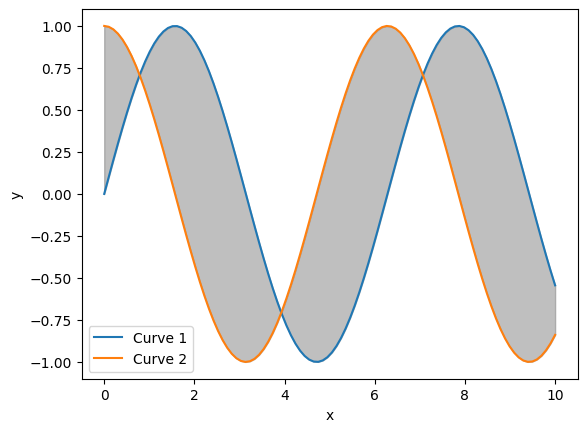

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values
x = np.linspace(0, 10, 100)

# Generate two curves
curve1 = np.sin(x)
curve2 = np.cos(x)

# Plot the curves
plt.plot(x, curve1, label='Curve 1')
plt.plot(x, curve2, label='Curve 2')

# Fill the area between the curves
plt.fill_between(x, curve1, curve2, color='gray', alpha=0.5)

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Show the plot
plt.show()
